In [1]:
#importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
#correlation

df = df[df['job_title_short']== 'Data Analyst']


In [10]:
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills','count'), #making new column, key, value, tuple, aggregation method
    median_salary = ('salary_year_avg', 'median')

)


skill_stats = skill_stats.sort_values(by= 'skill_count', ascending= False).head(10)

In [20]:
skill_stats

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


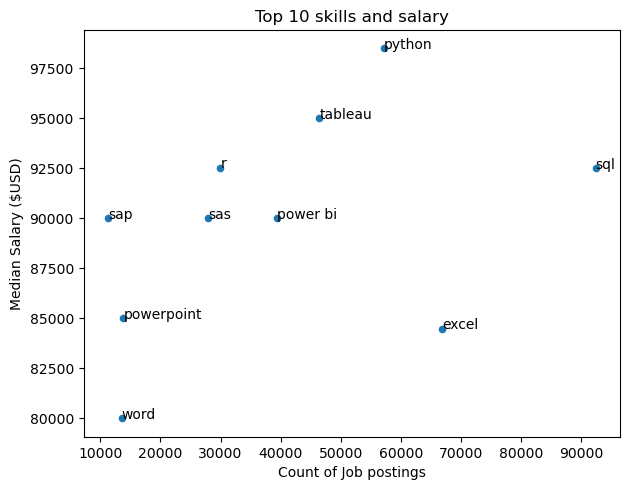

In [22]:
skill_stats.plot(kind= 'scatter', x= 'skill_count', y='median_salary')

plt.xlabel("Count of Job postings")
plt.ylabel("Median Salary ($USD)")

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i],txt)



plt.tight_layout()
plt.title("Top 10 skills and salary")
plt.show()